In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from lstchain.reco.dl1_to_dl2 import get_source_dependent_parameters
from lstchain.io import read_configuration_file, get_standard_config
from lstchain.io.io import dl1_params_src_dep_lstcam_key, write_dataframe, dl1_params_lstcam_key
from lstchain.io.io import(
    dl1_params_lstcam_key,
    dl1_params_src_dep_lstcam_key,
    dl2_params_lstcam_key,
    dl2_params_src_dep_lstcam_key,
    write_dataframe,
    set_srcdep_multi_index
)
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
camera003 = CameraGeometry.from_name('LSTCam-003')

In [2]:
config = read_configuration_file("../lstchain/data/lstchain_src_dep_config.json")
print(config['source_dependent'])

True


# MC point gamma

In the case of MC point gamma, expected source positions are true ones

In [3]:
dl1_filename = '/fefs/aswg/data/mc/DL1/20200629_prod5_trans_80/gamma/zenith_20deg/south_pointing/20210416_v0.7.3_prod5_trans_80_local_taicut_8_4/off0.4deg/training/dl1_gamma_20deg_180deg_run1___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono_off0.4.h5'
dl1_params = pd.read_hdf(dl1_filename, key=dl1_params_lstcam_key)

In [4]:
src_dep_df_mc_g = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [5]:
src_dep_df_mc_g['on']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha
0,0.195476,0.0,0.131340,6.873582,-0.285633,49.391533
1,0.195476,0.0,0.316250,0.889050,0.356330,5.563145
2,0.195476,0.0,0.412955,0.066240,1.630449,1.248136
3,0.195476,0.0,NaN,NaN,NaN,NaN
4,0.195476,0.0,0.847154,8.299026,0.090264,0.545271
...,...,...,...,...,...,...
2098,0.195476,0.0,0.115368,7.633515,0.549239,15.592970
2099,0.195476,0.0,0.277407,-4.764149,0.182851,1.406725
2100,0.195476,0.0,0.588884,14.411164,0.020476,1.153509
2101,0.195476,0.0,0.799507,11.406594,0.453160,12.269761


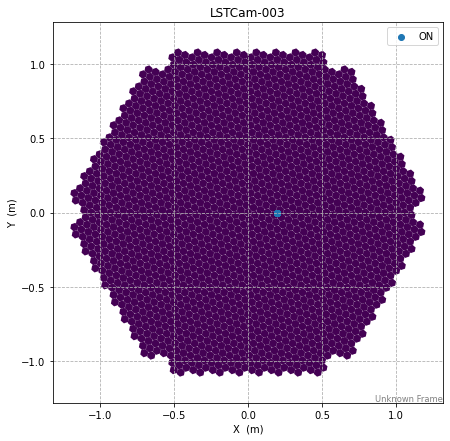

In [6]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)
plt.scatter(src_dep_df_mc_g['on'].expected_src_x, src_dep_df_mc_g['on'].expected_src_y, label='ON')
                    
plt.legend()
plt.grid(ls='--')
plt.show()

# MC proton

In the case of MC proton, expected source positions are calculated by using MC telescope pointing positions and defined nominal source position 

In [7]:
print("MC nominal source (x-axis): ", config['mc_nominal_source_x_deg'], " [deg]")
print("MC nominal source (y-axis): ", config['mc_nominal_source_y_deg'], " [deg]")

MC nominal source (x-axis):  0.4  [deg]
MC nominal source (y-axis):  0.0  [deg]


In [8]:
dl1_filename = '/fefs/aswg/data/mc/DL1/20200629_prod5_trans_80/proton/zenith_20deg/south_pointing/20210416_v0.7.3_prod5_trans_80_local_taicut_8_4/testing/dl1_proton_20deg_180deg_run1___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono.h5'
dl1_params = pd.read_hdf(dl1_filename, key=dl1_params_lstcam_key)

In [9]:
src_dep_df_mc_p = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [10]:
src_dep_df_mc_p['on']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha
0,0.195479,2.837272e-12,1.063832,-1.108781,-0.085468,78.166789
1,0.195479,2.837272e-12,0.346290,-1.322034,-0.142597,43.162427
2,0.195479,2.837272e-12,0.727772,4.243092,-0.153487,68.326506
3,0.195479,2.837272e-12,NaN,NaN,NaN,NaN
4,0.195479,2.837272e-12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
283,0.195479,2.837272e-12,0.779994,21.424281,-0.560018,62.663211
284,0.195479,2.837272e-12,1.199947,-5.283614,0.184259,23.023514
285,0.195479,2.837272e-12,NaN,NaN,NaN,NaN
286,0.195479,2.837272e-12,0.561502,-5.508233,0.269948,62.914181


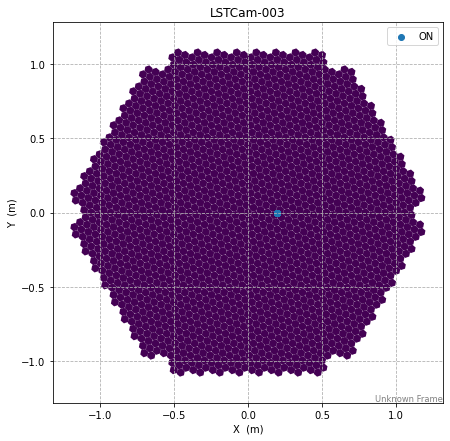

In [11]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)
plt.scatter(src_dep_df_mc_p['on'].expected_src_x, src_dep_df_mc_p['on'].expected_src_y, label='ON')
                    
plt.legend()
plt.grid(ls='--')
plt.show()

# Real data

In [12]:
dl1_filename = '/fefs/aswg/data/real/DL1/20201120/v0.7.3/tailcut84/dl1_LST-1.Run02970.0000.h5'
dl1_params = pd.read_hdf(dl1_filename, key=dl1_params_lstcam_key)

## wobble observation (n_off=3)

In the case of real wobble observation, expected source positions are computed by using telescope pointing position and specified source position in config

In [13]:
config['observation_mode'] = 'wobble'
config['n_off_wobble'] = 3
config['source_name'] = 'Crab'
# You need to specify the source ra/dec if source names are not registerd in astropy
# config['source_ra'] = 83.63308333 #[deg]
# config['ource_dec'] = 22.0145  #[deg]

In [14]:
src_dep_df_real_wobble3 = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [15]:
src_dep_df_real_wobble3

on                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0          -0.097602      -0.173423  0.190007                  4.291008   
1          -0.097602      -0.173423  0.945623                 -4.568587   
2          -0.097603      -0.173423       NaN                       NaN   
3          -0.097603      -0.173423  0.581261                 -5.843850   
4          -0.097603      -0.173423  1.030701                 -0.627809   
...              ...            ...       ...                       ...   
52995      -0.099320      -0.174117       NaN                       NaN   
52996      -0.099320      -0.174117  0.826217                 15.838430   
52997      -0.099320      -0.174117  0.996751                  3.895144   
52998      -0.099320      -0.174118  0.426367                 -3.308703   
52999      -0.099321      -0.174118  1.248919                  2.196620   

                                             off_090                           \
      skewness_from_source      alpha expected_src_x expected_src_y      dist   
0                 0.221347  76.003473       0.173423      -0.097602  0.284892   
1                -0.541996  22.116854       0.173423      -0.097602  0.754392   
2                      NaN        NaN       0.173423      -0.097603       NaN   
3                 0.292991   1.714456       0.173423      -0.097603  0.847121   
4                -0.083847  41.360323       0.173423      -0.097603  0.749800   
...                    ...        ...            ...            ...       ...   
52995                  NaN        NaN       0.174117      -0.099320       NaN   
52996             0.975056  82.162269       0.174117      -0.099320  1.049312   
52997            -0.081800   3.154206       0.174117      -0.099320  1.076422   
52998            -0.968139  21.028106       0.174118      -0.099320  0.518772   
52999            -0.026408   5.131997       0.174118      -0.099321  1.053192   

                                 ...              off_180             \
      time_gradient_from_source  ... skewness_from_source      alpha   
0                     -4.291008  ...            -0.221347  29.282817   
1                     -4.568587  ...            -0.541996  45.564677   
2                           NaN  ...                  NaN        NaN   
3                     -5.843850  ...             0.292991  10.520488   
4                     -0.627809  ...            -0.083847  62.513723   
...                         ...  ...                  ...        ...   
52995                       NaN  ...                  NaN        NaN   
52996                 15.838430  ...             0.975056  82.551953   
52997                  3.895144  ...            -0.081800  26.194486   
52998                 -3.308703  ...            -0.968139   0.055210   
52999                  2.196620  ...            -0.026408   3.444980   

                       off_270                           \
      off_angle expected_src_x expected_src_y      dist   
0         180.0      -0.173423       0.097602  0.118130   
1         180.0      -0.173423       0.097602  1.148731   
2         180.0      -0.173423       0.097603       NaN   
3         180.0      -0.173423       0.097603  0.739152   
4         180.0      -0.173423       0.097603  1.082541   
...         ...            ...            ...       ...   
52995     180.0      -0.174117       0.099320       NaN   
52996     180.0      -0.174117       0.099320  1.042720   
52997     180.0      -0.174117       0.099320  0.717740   
52998     180.0      -0.174118       0.099320  0.709780   
52999     180.0      -0.174118       0.099321  1.082432   

                                                                           
      time_gradient_from_source skewness_from_source      alpha off_angle  
0                      4.291008             0.221347  54.482621     270.0  
1                     -4.568587            -0.541996  3

In [16]:
print("Column (Level 0): ", src_dep_df_real_wobble3.columns.levels[0])
print("Column (Level 1): ", src_dep_df_real_wobble3.columns.levels[1])

Column (Level 0):  Index(['on', 'off_090', 'off_180', 'off_270'], dtype='object')
Column (Level 1):  Index(['alpha', 'dist', 'expected_src_x', 'expected_src_y', 'off_angle',
       'skewness_from_source', 'time_gradient_from_source'],
      dtype='object')


In [17]:
src_dep_df_real_wobble3['on']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha
0,-0.097602,-0.173423,0.190007,4.291008,0.221347,76.003473
1,-0.097602,-0.173423,0.945623,-4.568587,-0.541996,22.116854
2,-0.097603,-0.173423,NaN,NaN,NaN,NaN
3,-0.097603,-0.173423,0.581261,-5.843850,0.292991,1.714456
4,-0.097603,-0.173423,1.030701,-0.627809,-0.083847,41.360323
...,...,...,...,...,...,...
52995,-0.099320,-0.174117,NaN,NaN,NaN,NaN
52996,-0.099320,-0.174117,0.826217,15.838430,0.975056,82.162269
52997,-0.099320,-0.174117,0.996751,3.895144,-0.081800,3.154206
52998,-0.099320,-0.174118,0.426367,-3.308703,-0.968139,21.028106


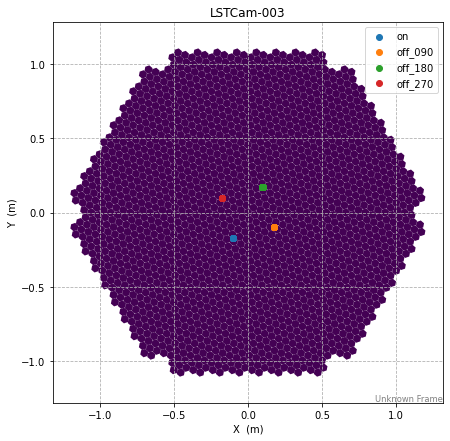

In [18]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)

for i, k in enumerate(src_dep_df_real_wobble3.columns.levels[0]):
    plt.scatter(src_dep_df_real_wobble3[k].expected_src_x, src_dep_df_real_wobble3[k].expected_src_y, label=k)
                    
plt.legend()
plt.grid(ls='--')
plt.show()

## wobble observation (n_off=5)

In [19]:
config['observation_mode'] = 'wobble'
config['n_off_wobble'] = 5
config['source_name'] = 'Crab'

In [20]:
src_dep_df_real_wobble5 = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

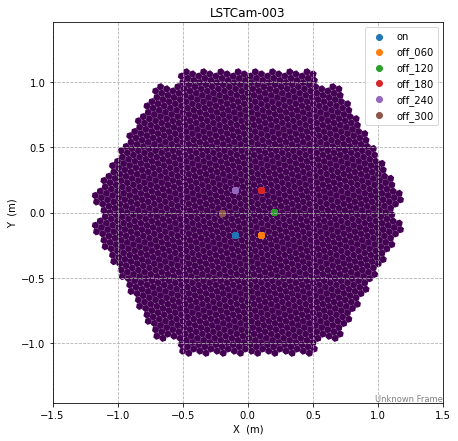

In [21]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)

for i, k in enumerate(src_dep_df_real_wobble5.columns.levels[0]):
    plt.scatter(src_dep_df_real_wobble5[k].expected_src_x, src_dep_df_real_wobble5[k].expected_src_y, label=k)
                    
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(ls='--')
plt.show()

## ON observation

In the case of real ON observation, expected source positions are always at the center of the camera

In [22]:
config['observation_mode'] = 'on'

In [23]:
src_dep_df_real_on = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [24]:
src_dep_df_real_on

on                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0                0.0            0.0  0.089204                 -4.291008   
1                0.0            0.0  0.951180                 -4.568587   
2                0.0            0.0       NaN                       NaN   
3                0.0            0.0  0.769661                 -5.843850   
4                0.0            0.0  0.909640                 -0.627809   
...              ...            ...       ...                       ...   
52995            0.0            0.0       NaN                       NaN   
52996            0.0            0.0  1.026635                 15.838430   
52997            0.0            0.0  0.892601                  3.895144   
52998            0.0            0.0  0.588451                 -3.308703   
52999            0.0            0.0  1.048930                  2.196620   

                                       
      skewness_from_source      alpha  
0                -0.221347  21.553783  
1                -0.541996  34.156649  
2                      NaN        NaN  
3                 0.292991   7.206483  
4                -0.083847  50.716635  
...                    ...        ...  
52995                  NaN        NaN  
52996             0.975056  82.395149  
52997            -0.081800  13.572221  
52998            -0.968139   7.505696  
52999            -0.026408   4.449218  

[53000 rows x 6 columns]

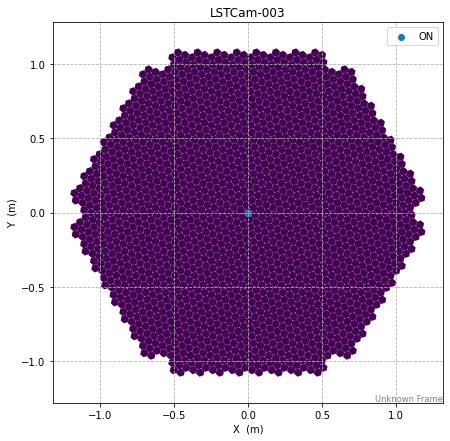

In [25]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)
plt.scatter(src_dep_df_real_on['on'].expected_src_x, src_dep_df_real_on['on'].expected_src_y, label='ON')
                    
plt.legend()
plt.grid(ls='--')
plt.show()

# Read DL2 data with source-dependent parameters

In [26]:
file = '/fefs/aswg/workspace/seiya.nozaki/data/Crab/v0.7.2_tail8_4/20201119/srcdep/DL2_raw/Run02953/dl2_LST-1.Run02953.0000.h5'
dl2_srcindep_df= pd.read_hdf(file, key=dl2_params_lstcam_key)
dl2_srcdep_df= pd.read_hdf(file, key=dl2_params_src_dep_lstcam_key)
set_srcdep_multi_index(dl2_srcdep_df)

In [27]:
dl2_srcindep_df

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,width,...,log_reco_energy,reco_energy,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,reco_alt,reco_az,reco_type,gammaness
0,2953,1,5502.966981,3.740597,0.027072,-0.030740,0.040961,-0.848769,1.159445,1.107809,...,0.042716,1.103357,-0.230404,-0.032586,-0.203332,-0.063326,1.416362,3.747154,101,0.015000
1,2953,4,67.749634,1.830907,0.548158,0.740118,0.921006,0.933315,0.077418,0.055413,...,-0.675106,0.211298,0.732717,0.073063,1.280875,0.813181,1.465350,4.041075,101,0.020000
2,2953,15,58.715875,1.768756,-0.102904,-0.402573,0.415517,-1.821053,0.068049,0.038776,...,-1.447437,0.035691,-0.019730,0.021593,-0.122633,-0.380980,1.418655,3.671961,101,0.384857
3,2953,16,77.786388,1.890904,0.079463,0.970072,0.973321,1.489064,0.086384,0.058245,...,-0.786277,0.163577,-0.094090,0.049373,-0.014626,1.019445,1.418727,4.004527,101,0.034667
4,2953,24,248.113569,2.394651,0.331693,-0.262170,0.422793,-0.668860,0.366097,0.069482,...,-1.199458,0.063175,0.095442,-0.096177,0.427135,-0.358347,1.438281,3.664858,101,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,2953,52983,621.574860,2.793493,-0.047140,-0.931916,0.933108,-1.621337,0.203879,0.195585,...,-0.470544,0.338420,0.295257,0.094059,0.248117,-0.837857,1.429038,3.551584,101,0.000000
16678,2953,52984,488.796652,2.689128,-0.860906,0.491947,0.991549,2.622446,0.605412,0.169633,...,-0.454667,0.351021,0.100170,0.087910,-0.760736,0.579857,1.394961,3.883566,101,0.000000
16679,2953,52991,420.812506,2.624089,-0.001510,0.520437,0.520439,1.573699,0.154467,0.113491,...,-1.159418,0.069276,0.019647,0.022330,0.018137,0.542767,1.422729,3.896725,101,0.012333
16680,2953,52995,48.054748,1.681736,0.504566,-0.683274,0.849382,-0.934726,0.065329,0.034197,...,-0.761690,0.173105,0.819635,0.060140,1.324201,-0.623134,1.468221,3.546134,101,0.026786


In [28]:
dl2_srcdep_df

off_180                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0          -0.182010       0.074489  0.234069                  3.546117   
1          -0.182010       0.074489  0.988032                  3.940786   
2          -0.182010       0.074489  0.483576                 -7.677238   
3          -0.182010       0.074489  0.932972                 -4.540725   
4          -0.182010       0.074489  0.614191                -26.607512   
...              ...            ...       ...                       ...   
16677      -0.182461       0.074550  1.015522                  2.553113   
16678      -0.182461       0.074550  0.796560                 -1.740973   
16679      -0.182461       0.074550  0.481206                 -4.371460   
16680      -0.182461       0.074550  1.022890                  0.799514   
16681      -0.182461       0.074550  0.277510                  5.616763   

                                                                             \
      skewness_from_source      alpha off_angle log_reco_energy reco_energy   
0                 0.068256  64.754241     180.0        0.042716    1.103357   
1                 0.193677  35.502683     180.0       -0.675106    0.211298   
2                 0.686458  14.060536     180.0       -1.447437    0.035691   
3                 0.750985  61.387905     180.0       -0.786277    0.163577   
4                -0.145031  18.207574     180.0       -1.199458    0.063175   
...                    ...        ...       ...             ...         ...   
16677            -1.209167  50.990885     180.0       -0.470544    0.338420   
16678             0.241193  89.823965     180.0       -0.454667    0.351021   
16679            -0.298631  68.184606     180.0       -1.159418    0.069276   
16680            -0.153380  61.437912     180.0       -0.761690    0.173105   
16681            -0.218030  14.152208     180.0       -1.566092    0.027159   

                    ...              on                                        \
      reco_disp_dx  ... log_reco_energy reco_energy reco_disp_dx reco_disp_dy   
0        -0.230404  ...       -0.301598    0.499347    -0.250205    -0.097130   
1         0.732717  ...       -0.781631    0.165337     0.283448    -0.241021   
2        -0.019730  ...       -1.570497    0.026885    -0.043075    -0.085670   
3        -0.094090  ...       -0.729115    0.186589     0.421808    -0.061677   
4         0.095442  ...       -1.270806    0.053604     0.038052    -0.021744   
...            ...  ...             ...         ...          ...          ...   
16677     0.295257  ...       -0.426975    0.374132    -0.367564     0.006420   
16678     0.100170  ...       -0.304440    0.496090     1.099976    -0.015277   
16679     0.019647  ...       -1.097660    0.079862     0.028971     0.064345   
16680     0.819635  ...       -1.126835    0.074673     0.097764     0.008985   
16681    -0.057733  ...       -1.558320    0.027649     0.002124    -0.016143   

                                                                     
      reco_src_x reco_src_y  reco_alt   reco_az reco_type gammaness  
0      -0.223134  -0.127870  1.415604  3.732309       101  0.005000  
1       0.831607   0.499097  1.452008  3.912764       101  0.045000  
2      -0.145979  -0.488243  1.417439  3.647465       101  0.366167  
3       0.501271   0.908395  1.437566  4.008498       101  0.012333  
4       0.369745  -0.283914  1.436465  3.686082       101  0.008333  
...          ...        ...       ...       ...       ...       ...  
16677  -0.414703  -0.925496  1.405225  3.563099       101  0.002500  
16678   0.239070   0.476670  1.430853  3.887297       101  0.000000  
16679   0.027461   0.584782  1.422856  3.907113       101  0.000000  
16680   0.602329  -0.674289  1.442595  3.575529       101  0.226833  
16681   0.043953   0.221824  1.424702  3.819404         0  0.539429  

[16682 rows x 33 columns]

In [29]:
print("Column (Level 0): ", dl2_srcdep_df.columns.levels[0])
print("Column (Level 1): ", dl2_srcdep_df.columns.levels[1])

Column (Level 0):  Index(['off_180', 'on'], dtype='object')
Column (Level 1):  Index(['alpha', 'dist', 'expected_src_x', 'expected_src_y', 'gammaness',
       'log_reco_energy', 'off_angle', 'reco_alt', 'reco_az', 'reco_disp_dx',
       'reco_disp_dy', 'reco_energy', 'reco_src_x', 'reco_src_y', 'reco_type',
       'skewness_from_source', 'time_gradient_from_source'],
      dtype='object')


In [30]:
dl2 = pd.concat([dl2_srcindep_df, dl2_srcdep_df['on']], axis=1)
dl2

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,width,...,log_reco_energy,reco_energy,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,reco_alt,reco_az,reco_type,gammaness
0,2953,1,5502.966981,3.740597,0.027072,-0.030740,0.040961,-0.848769,1.159445,1.107809,...,-0.301598,0.499347,-0.250205,-0.097130,-0.223134,-0.127870,1.415604,3.732309,101,0.005000
1,2953,4,67.749634,1.830907,0.548158,0.740118,0.921006,0.933315,0.077418,0.055413,...,-0.781631,0.165337,0.283448,-0.241021,0.831607,0.499097,1.452008,3.912764,101,0.045000
2,2953,15,58.715875,1.768756,-0.102904,-0.402573,0.415517,-1.821053,0.068049,0.038776,...,-1.570497,0.026885,-0.043075,-0.085670,-0.145979,-0.488243,1.417439,3.647465,101,0.366167
3,2953,16,77.786388,1.890904,0.079463,0.970072,0.973321,1.489064,0.086384,0.058245,...,-0.729115,0.186589,0.421808,-0.061677,0.501271,0.908395,1.437566,4.008498,101,0.012333
4,2953,24,248.113569,2.394651,0.331693,-0.262170,0.422793,-0.668860,0.366097,0.069482,...,-1.270806,0.053604,0.038052,-0.021744,0.369745,-0.283914,1.436465,3.686082,101,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,2953,52983,621.574860,2.793493,-0.047140,-0.931916,0.933108,-1.621337,0.203879,0.195585,...,-0.426975,0.374132,-0.367564,0.006420,-0.414703,-0.925496,1.405225,3.563099,101,0.002500
16678,2953,52984,488.796652,2.689128,-0.860906,0.491947,0.991549,2.622446,0.605412,0.169633,...,-0.304440,0.496090,1.099976,-0.015277,0.239070,0.476670,1.430853,3.887297,101,0.000000
16679,2953,52991,420.812506,2.624089,-0.001510,0.520437,0.520439,1.573699,0.154467,0.113491,...,-1.097660,0.079862,0.028971,0.064345,0.027461,0.584782,1.422856,3.907113,101,0.000000
16680,2953,52995,48.054748,1.681736,0.504566,-0.683274,0.849382,-0.934726,0.065329,0.034197,...,-1.126835,0.074673,0.097764,0.008985,0.602329,-0.674289,1.442595,3.575529,101,0.226833
